# CICIDS 2017 Data Cleaning 

## Setup

In [1]:
import numpy as np
import pandas as pd
import config
from pathlib import Path
import os
import sys

In [2]:
config.CICIDS2017_ROOT

WindowsPath('E:/NIDS_HPO/IDS datasets/CICIDS2017/CSVs/MachineLearningCSV/MachineLearningCVE')

In [3]:
os.listdir(config.CICIDS2017_ROOT)

['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv']

In [4]:
data = {}
for f in os.listdir(config.CICIDS2017_ROOT):
    data[f[:-len('.pcap_ISCX.csv')]] = pd.read_csv(config.CICIDS2017_ROOT / f)

In [5]:
sys.getsizeof(data['Friday-WorkingHours-Afternoon-DDos']) / 1_000**2, 'MB'

(153.024965, 'MB')

In [6]:
for key, item in data.items():
    print(key, len(item))

Friday-WorkingHours-Afternoon-DDos 225745
Friday-WorkingHours-Afternoon-PortScan 286467
Friday-WorkingHours-Morning 191033
Monday-WorkingHours 529918
Thursday-WorkingHours-Afternoon-Infilteration 288602
Thursday-WorkingHours-Morning-WebAttacks 170366
Tuesday-WorkingHours 445909
Wednesday-workingHours 692703


In [7]:
data['Friday-WorkingHours-Afternoon-DDos'].head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
data['Friday-WorkingHours-Afternoon-DDos'][' Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

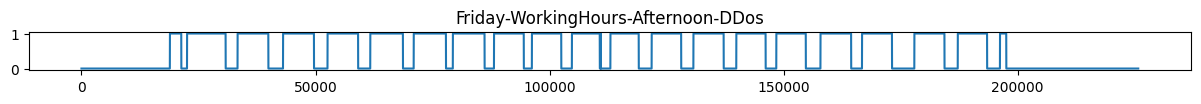

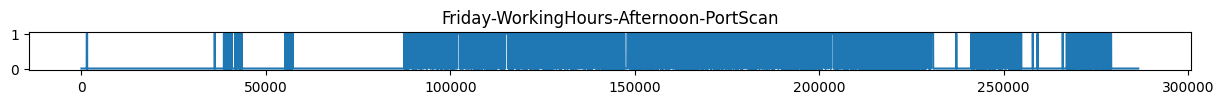

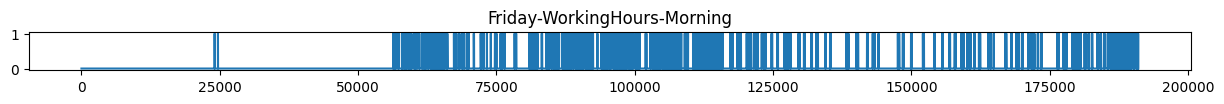

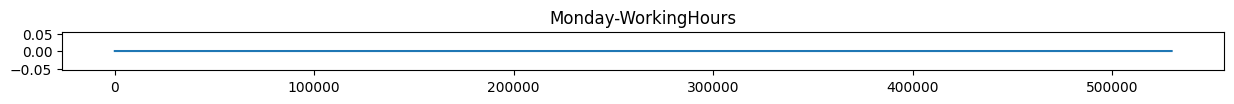

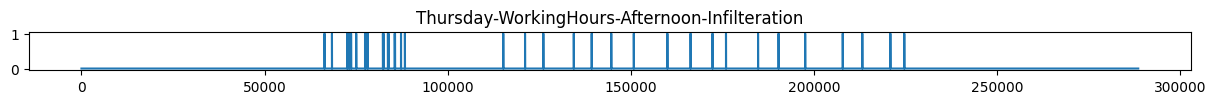

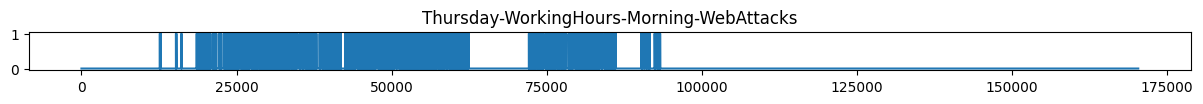

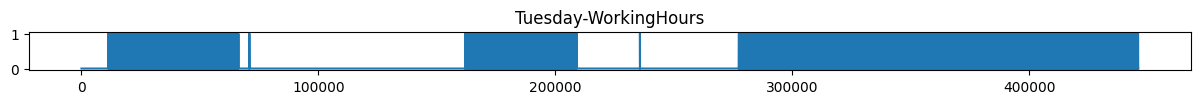

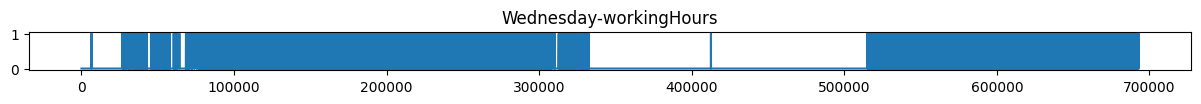

In [9]:
import matplotlib.pyplot as plt

for key, df in data.items():
    f, a = plt.subplots(figsize=(15, 0.5))
    df['Label Binary'] = df[' Label'].map(lambda x: x != 'BENIGN').astype(int)
    df['Label Binary'][:len(df)].plot()
    plt.title(key)
    plt.show()


In [10]:
df = pd.concat((val for key, val in data.items()))
for d in data: del d
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label Binary
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 692702
Data columns (total 80 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

## Cleaning

In [12]:
np.unique(df[' Label'])

array(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH-Patator',
       'Web Attack � Brute Force', 'Web Attack � Sql Injection',
       'Web Attack � XSS'], dtype=object)

In [13]:
col_names = {col: col.strip() for col in df.columns}
df.rename(columns = col_names, inplace = True)

In [14]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [15]:
pd.isna(df).any().sum()

ERROR! Session/line number was not unique in database. History logging moved to new session 341


np.int64(2)

In [16]:
df = df.dropna()

In [17]:
# categorical columns and useless 1-category cols

useless = []
categorical = []
for c in df.columns:
    u = len(df[c].unique())
    if u == 1:
        useless.append(c)
    elif u < 100:
        categorical.append(c)

useless

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [18]:
categorical

['Fwd PSH Flags',
 'Fwd URG Flags',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'URG Flag Count',
 'CWE Flag Count',
 'ECE Flag Count',
 'Down/Up Ratio',
 'min_seg_size_forward',
 'Label',
 'Label Binary']

In [19]:
[categorical.remove(c) for c in [
    'FIN Flag Count',
     'SYN Flag Count',
     'RST Flag Count',
     'PSH Flag Count',
     'ACK Flag Count',
     'URG Flag Count',
     'CWE Flag Count',
     'ECE Flag Count',
     'Down/Up Ratio',
]]
categorical

['Fwd PSH Flags',
 'Fwd URG Flags',
 'min_seg_size_forward',
 'Label',
 'Label Binary']

In [20]:
df['Bwd Avg Bulk Rate'].unique()

array([0])

In [21]:
df = df.drop(useless, axis=1, errors='ignore')
df[categorical] = df[categorical].astype('category')

In [23]:
df.to_csv(config.INTERM_DIR / 'unsw_cleaned_full.csv', index=False)

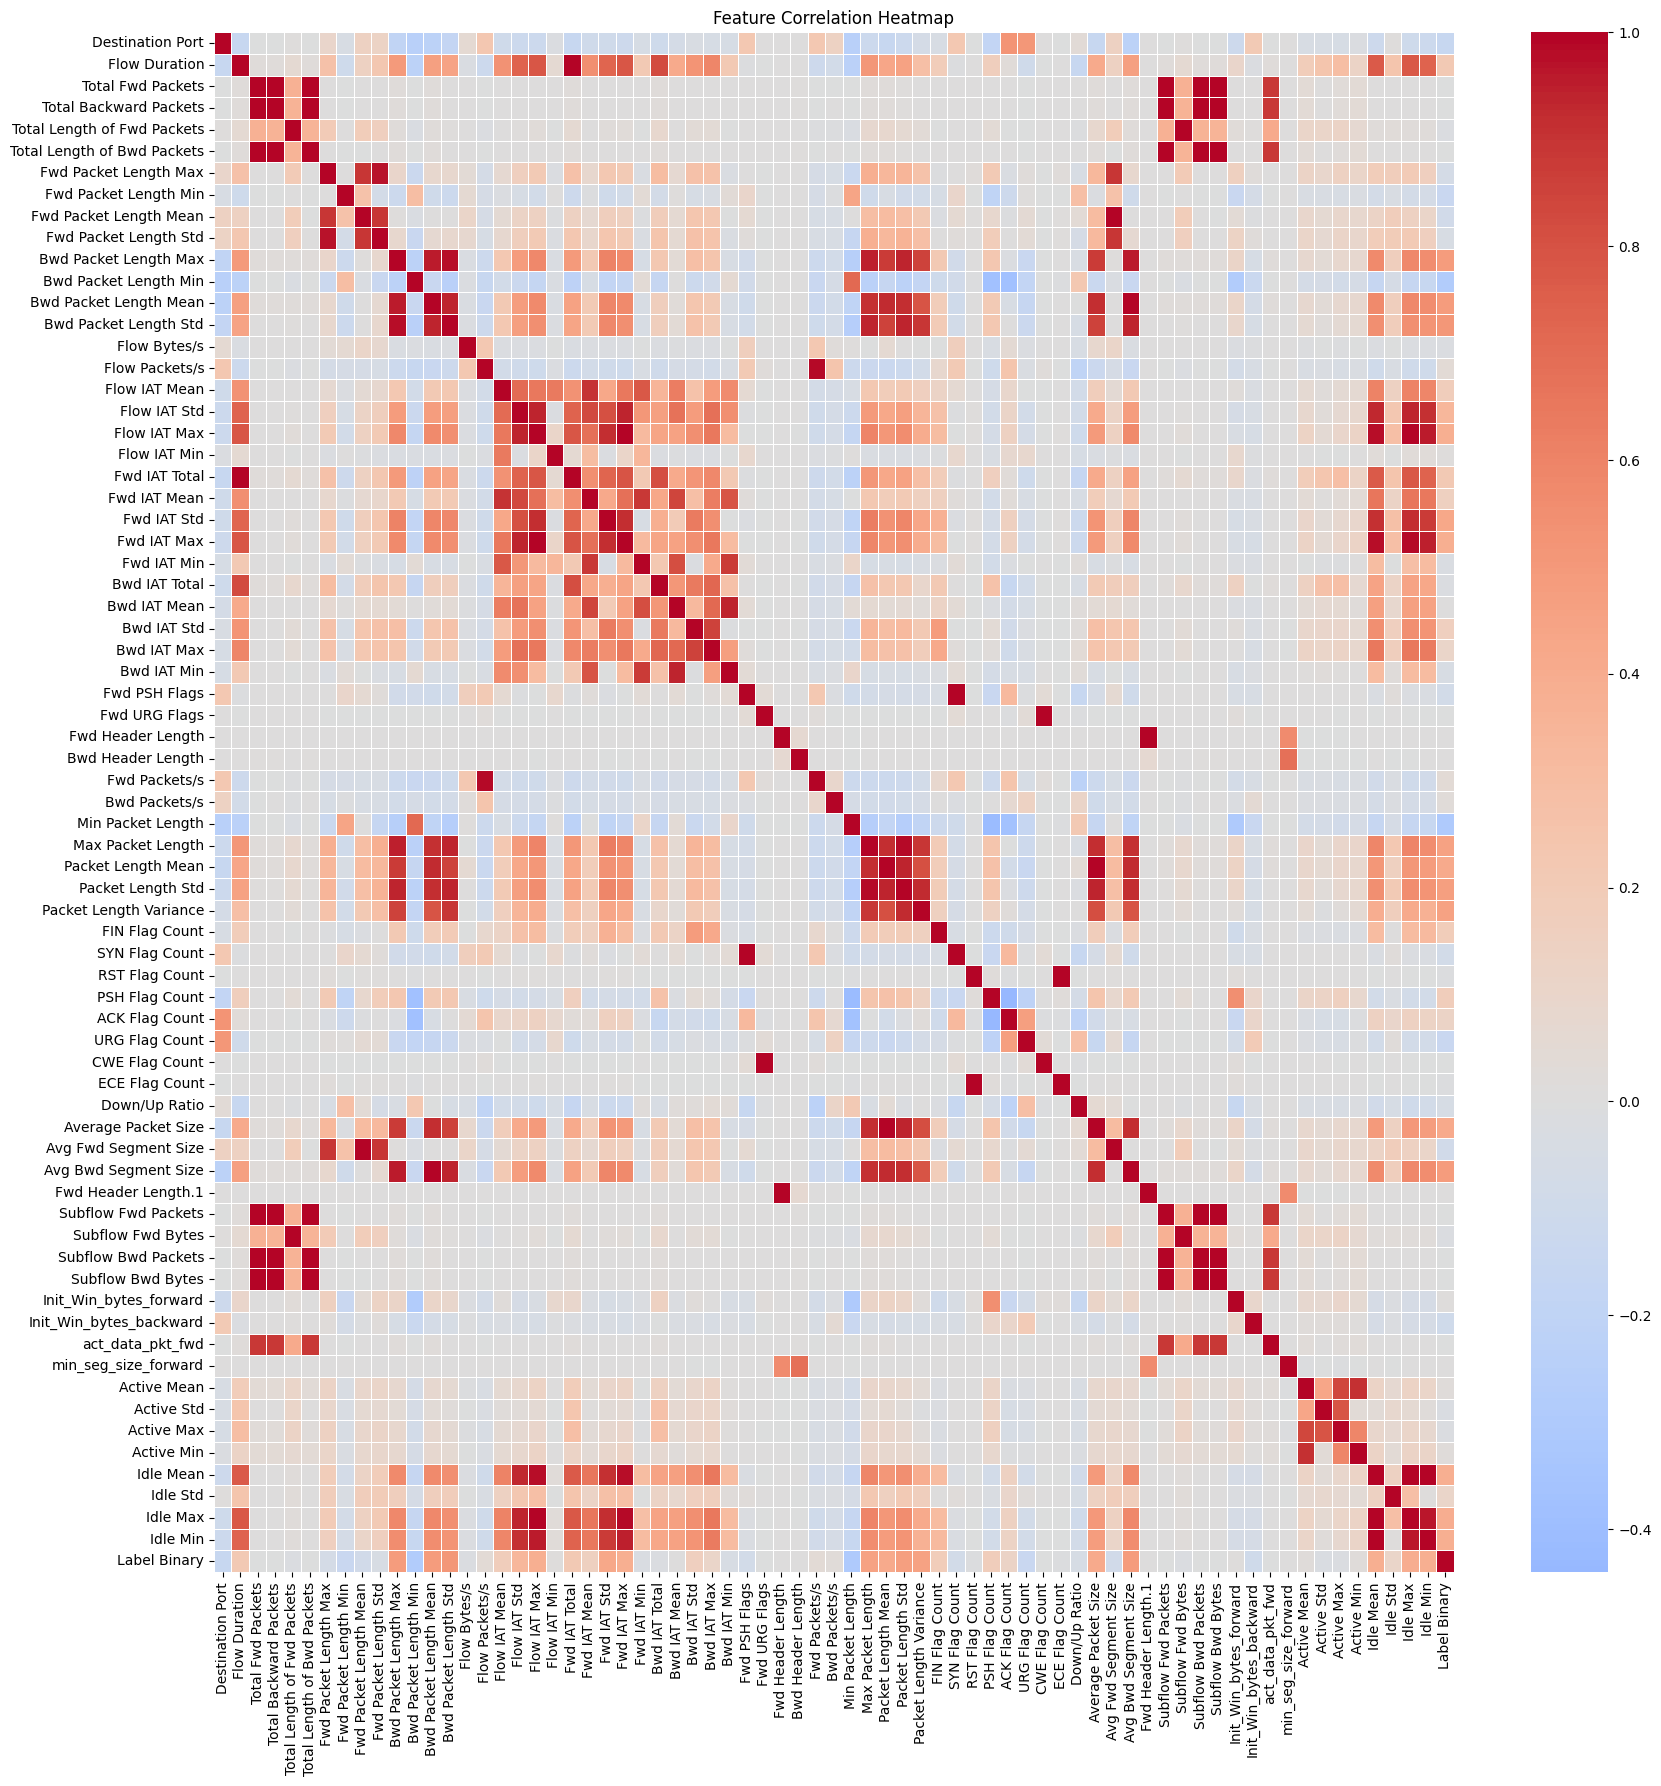

NameError: name 'threshold' is not defined

In [24]:
import seaborn as sns

numeric_features = list(df.columns) 
numeric_features.remove("Label")
corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidth = 0.5)
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


# high_corr = np.where(np.abs(corr_matrix) > threshold)
# high_corr = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y])
#              for x, y in zip(*high_corr) if x != y and x < y]